In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_support_tickets.csv')

In [3]:
data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

1. Data Preprocessing

In [5]:
print(data.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [6]:
# Convert to datetime
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')


In [7]:
data['First Response Time'].fillna(data['First Response Time'].median(), inplace=True)
data['Time to Resolution'].fillna(data['Time to Resolution'].median(), inplace=True)


C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_11156\2693465650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['First Response Time'].fillna(data['First Response Time'].median(), inplace=True)
C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_11156\2693465650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [8]:
# Keep only rows where target value exists
data= data[data['Customer Satisfaction Rating'].notnull()].copy()

In [9]:
data.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [10]:
data.describe()

,Ticket ID,Customer Age,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,2769.000000,2769.000000,2769,2769,2769.000000
mean,4237.163597,44.333694,2023-06-01 11:20:49.245575936,2023-06-01 11:17:21.509931520,2.991333
min,3.000000,18.000000,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000
25%,2145.000000,31.000000,2023-06-01 05:19:36,2023-06-01 05:34:43,2.000000
50%,4240.000000,45.000000,2023-06-01 11:22:02,2023-06-01 11:17:48,3.000000
75%,6329.000000,57.000000,2023-06-01 17:27:08,2023-06-01 17:07:32,4.000000
max,8468.000000,70.000000,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000
std,2446.830952,15.195495,NaN,NaN,1.407016


In [11]:
data.duplicated().sum()

0

2. Exploratory Data Analysis (EDA)

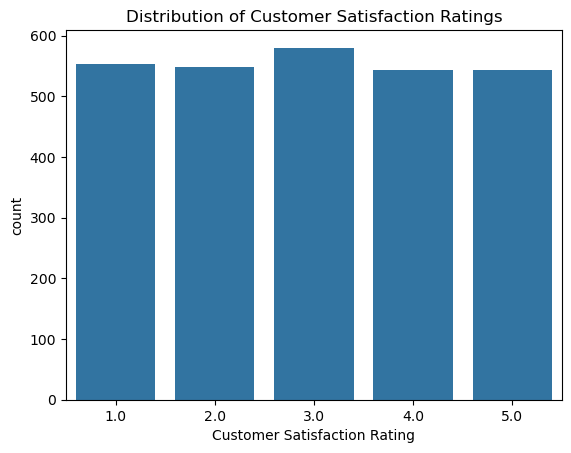

In [12]:
# Basic Info and Target Distribution
sns.countplot(x='Customer Satisfaction Rating',data=data)
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()

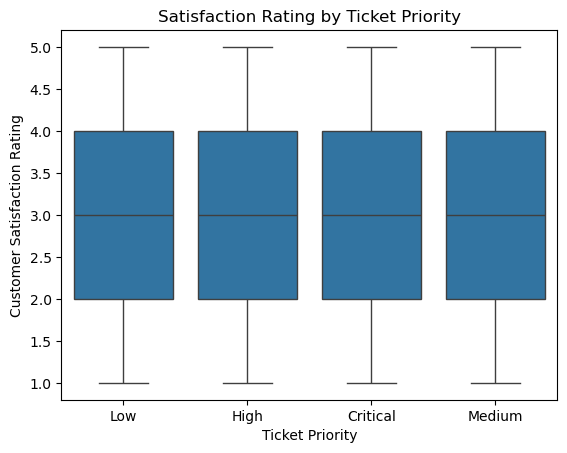

In [13]:
# Satisfaction by Ticket Priority
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=data)
plt.title('Satisfaction Rating by Ticket Priority')
plt.show()

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_11156\586187116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Purchased', y='Customer Satisfaction Rating', data=data,palette='pastel')


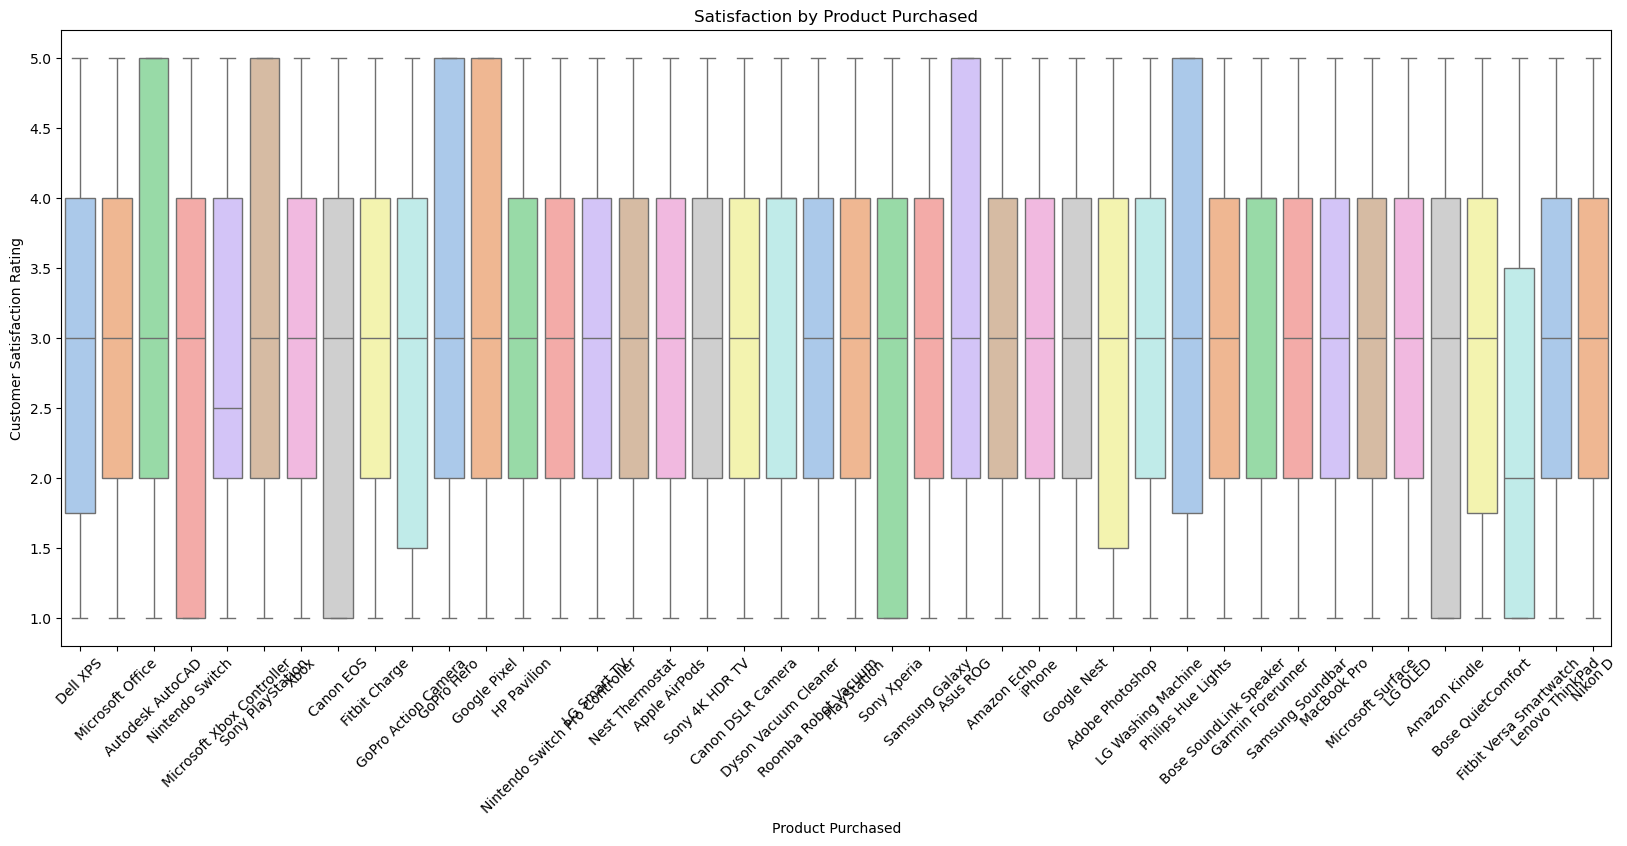

In [14]:
# Satisfaction by Product 

plt.figure(figsize=(20,8))
sns.boxplot(x='Product Purchased', y='Customer Satisfaction Rating', data=data,palette='pastel')
plt.xticks(rotation=45,fontsize=10)
plt.title('Satisfaction by Product Purchased')
plt.show()



C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_11156\3561810810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket Type', y='Customer Satisfaction Rating', data=data,palette='muted')


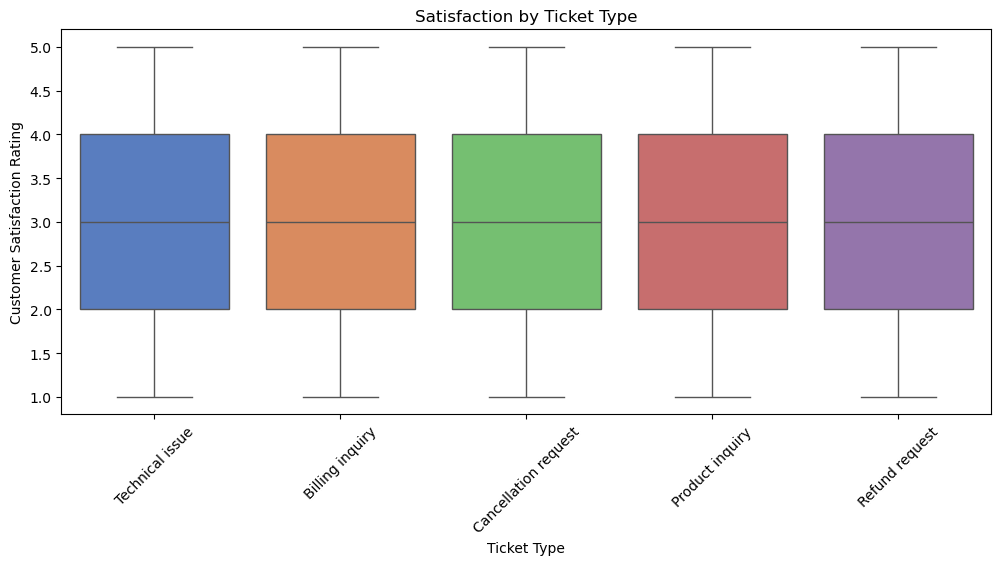

In [15]:
# Satisfaction by Ticket Type

plt.figure(figsize=(12,5))
sns.boxplot(x='Ticket Type', y='Customer Satisfaction Rating', data=data,palette='muted')
plt.xticks(rotation=45)
plt.title('Satisfaction by Ticket Type')
plt.show()


C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_11156\1088791927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticket Channel',


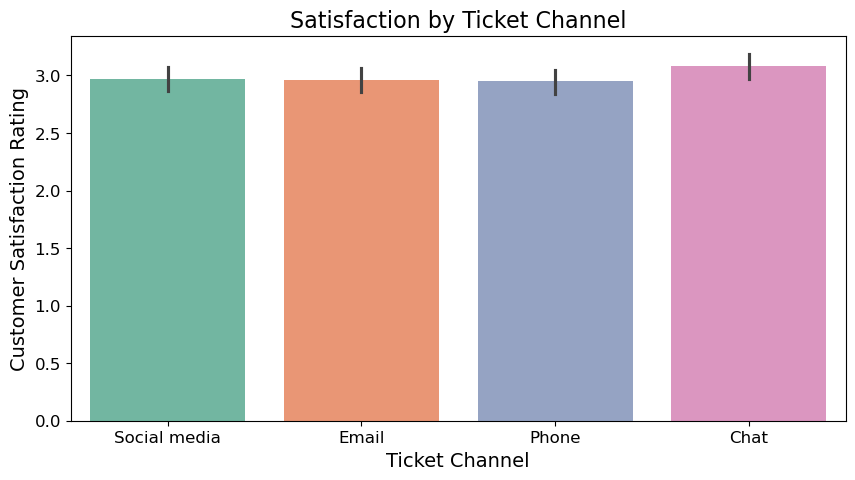

In [16]:
# Satisfaction by Ticket Channel
plt.figure(figsize=(10,5))
sns.barplot(x='Ticket Channel', 
            y='Customer Satisfaction Rating', 
            data=data, 
            palette='Set2')  
plt.title('Satisfaction by Ticket Channel', fontsize=16)
plt.xlabel('Ticket Channel', fontsize=14)
plt.ylabel('Customer Satisfaction Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_11156\3521287339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Gender',


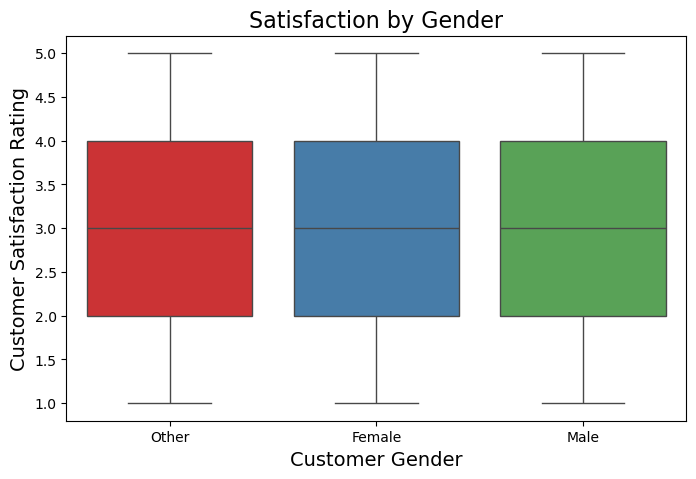

In [17]:
# Satisfaction vs. Age and Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Gender', 
            y='Customer Satisfaction Rating', 
            data=data, 
            palette='Set1') 
plt.title('Satisfaction by Gender', fontsize=16)
plt.xlabel('Customer Gender', fontsize=14)
plt.ylabel('Customer Satisfaction Rating', fontsize=14)
plt.show()


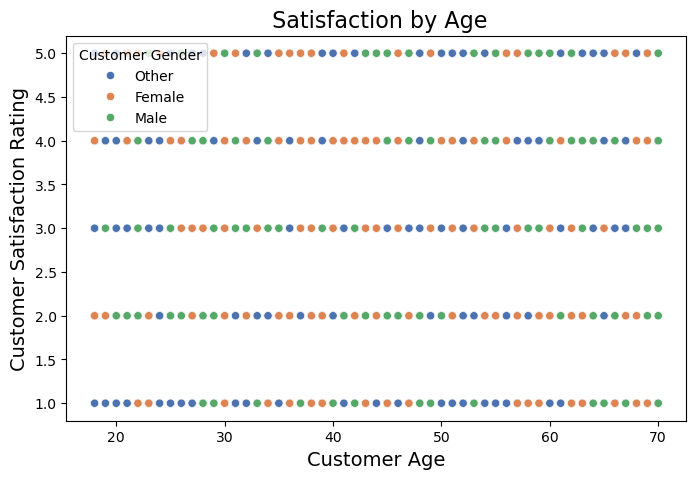

In [18]:
# Satisfaction vs.  Gender
plt.figure(figsize=(8,5))
sns.scatterplot(x='Customer Age', 
                y='Customer Satisfaction Rating', 
                data=data, 
                hue='Customer Gender',  
                palette='deep')       
plt.title(' Satisfaction by Age', fontsize=16)
plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Customer Satisfaction Rating', fontsize=14)
plt.show()


In [19]:
#packages for machine learning related tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Select features (X) and target (y)
X = data.drop(columns=['Customer Satisfaction Rating',  'Customer Name','Product Purchased', 'Customer Email', 'Ticket Description', 'Ticket Subject', 
                       'Resolution','Ticket Type','Ticket Status','Ticket Channel','Time to Resolution',
                      'First Response Time','Date of Purchase']) 
y = data['Customer Satisfaction Rating']  # Target column

In [21]:
X

,Ticket ID,Customer Age,Customer Gender,Ticket Priority
2,3,48,Other,Low
3,4,27,Female,Low
4,5,67,Female,Low
10,11,48,Male,High
11,12,51,Male,High
...,...,...,...,...
8452,8453,62,Female,Critical
8453,8454,61,Other,High
8455,8456,54,Other,High
8466,8467,57,Female,High


In [22]:
y

2       3.0
3       3.0
4       1.0
10      1.0
11      1.0
       ... 
8452    3.0
8453    5.0
8455    1.0
8466    3.0
8467    3.0
Name: Customer Satisfaction Rating, Length: 2769, dtype: float64

In [23]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [25]:
# Check the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2215, 9) (554, 9) (2215,) (554,)


In [26]:
# Initialize the scaler
scaler = StandardScaler()

In [27]:
# Fit and transform on the training data
X_train = scaler.fit_transform(X_train)

In [28]:
# Only transform the test data (to avoid data leakage)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [30]:
# Encode labels
from sklearn.preprocessing import LabelEncoder

In [31]:
label_enc = LabelEncoder()

In [32]:
# Train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([3., 5., 5., 4., 1., 1., 2., 3., 3., 3., 5., 3., 3., 1., 3., 5., 1.,
       4., 4., 2., 2., 2., 5., 1., 5., 5., 5., 4., 4., 3., 2., 3., 2., 4.,
       3., 4., 3., 2., 3., 5., 2., 2., 4., 5., 1., 3., 1., 4., 2., 5., 5.,
       1., 3., 1., 1., 5., 5., 3., 2., 1., 3., 2., 5., 2., 4., 3., 5., 1.,
       3., 5., 3., 4., 5., 4., 4., 5., 1., 2., 3., 5., 4., 3., 1., 3., 5.,
       3., 2., 1., 3., 4., 1., 2., 3., 1., 4., 1., 3., 2., 2., 5., 3., 4.,
       5., 2., 3., 5., 2., 2., 2., 4., 1., 1., 1., 4., 2., 2., 5., 3., 5.,
       1., 1., 3., 5., 1., 2., 5., 2., 1., 3., 3., 3., 4., 3., 4., 5., 2.,
       4., 2., 1., 4., 2., 3., 4., 5., 3., 3., 5., 3., 2., 4., 1., 1., 1.,
       2., 4., 5., 5., 2., 3., 2., 1., 3., 4., 1., 1., 2., 3., 5., 4., 1.,
       5., 5., 5., 3., 3., 3., 1., 5., 1., 4., 1., 4., 2., 2., 5., 4., 1.,
       5., 2., 2., 5., 3., 5., 2., 3., 2., 5., 5., 2., 5., 1., 1., 3., 4.,
       3., 5., 3., 3., 2., 2., 1., 5., 3., 3., 3., 3., 4., 4., 5., 4., 5.,
       5., 5., 2., 2., 1.

In [35]:
from sklearn.metrics import *

In [36]:
accuracy_score(y_test,y_pred)

0.22563176895306858

In [37]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[20, 25, 23, 19, 22],
       [22, 30, 18, 20, 27],
       [19, 28, 29, 15, 21],
       [18, 25, 25, 20, 20],
       [23, 26, 18, 15, 26]], dtype=int64)

<Axes: >

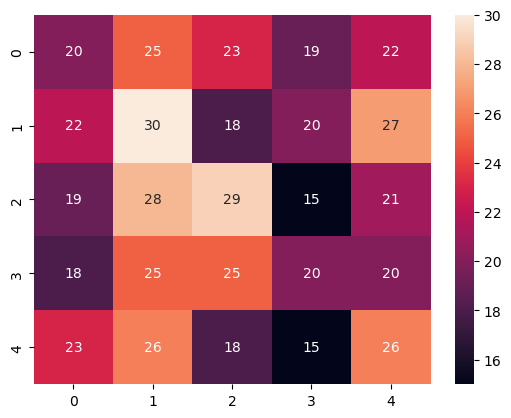

In [38]:
sns.heatmap(cm,annot = True,fmt = "d")

In [39]:
#hyper parameter tuning
param_grid ={
    "n_estimators":[100,200,300],
    "max_depth":[1,5,10],
    "min_samples_split":[2,5,7],
    "min_samples_leaf":[1,2,4],
    "criterion":['gini','entropy']}

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [41]:
model = RandomForestClassifier(random_state=42)

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]}

In [43]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

In [44]:
grid_search.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [45]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [46]:
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Cross-Validation Score: 0.21173814898419865


In [47]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [48]:
final_model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 100,random_state = 23)

In [49]:
final_model.fit(X_train,y_train).fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       random_state=23)

In [50]:
y_final_pred = final_model.predict(X_test)

In [51]:
accuracy_score(y_test,y_final_pred )

0.18953068592057762

#boosting

In [54]:
!pip install xgboost


In [55]:
from xgboost import XGBClassifier

In [56]:
X = pd.get_dummies(X)

In [57]:
# Shift classes to start from 0
y = y - 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)


In [58]:
model = XGBClassifier(random_state=42)

In [59]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
y_predict = model.predict(X_test)


In [70]:
accuracy_score(y_test,y_predict)

0.1931407942238267

In [61]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.1931407942238267


In [71]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[23, 27, 27, 18, 16],
       [20, 18, 27, 30, 15],
       [22, 15, 30, 24, 25],
       [18, 24, 23, 19, 24],
       [16, 18, 38, 20, 17]], dtype=int64)

In [72]:
# Detailed metrics
print("Classification Report:", classification_report(y_test, y_predict))

Classification Report:               precision    recall  f1-score   support

         0.0       0.23      0.21      0.22       111
         1.0       0.18      0.16      0.17       110
         2.0       0.21      0.26      0.23       116
         3.0       0.17      0.18      0.17       108
         4.0       0.18      0.16      0.17       109

    accuracy                           0.19       554
   macro avg       0.19      0.19      0.19       554
weighted avg       0.19      0.19      0.19       554



In [64]:
print("Confusion Matri:", confusion_matrix(y_test, y_pred))


Confusion Matri: [[ 0 23 27 26 17 18]
 [ 0 19 23 25 18 25]
 [ 0 20 31 24 10 31]
 [ 0 20 28 15 24 21]
 [ 0 20 25 23 20 21]
 [ 0  0  0  0  0  0]]


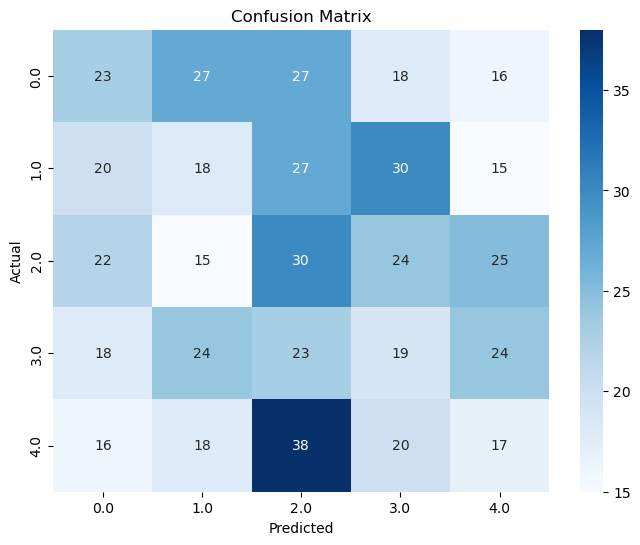

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Axes: >

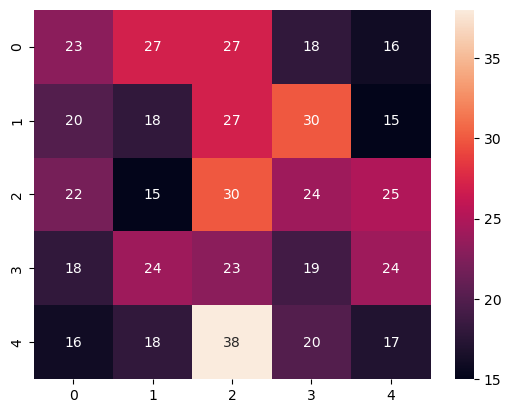

In [75]:
sns.heatmap(conf_matrix,annot = True,fmt = "d")

In [76]:
import matplotlib.pyplot as plt
from xgboost import plot_importance



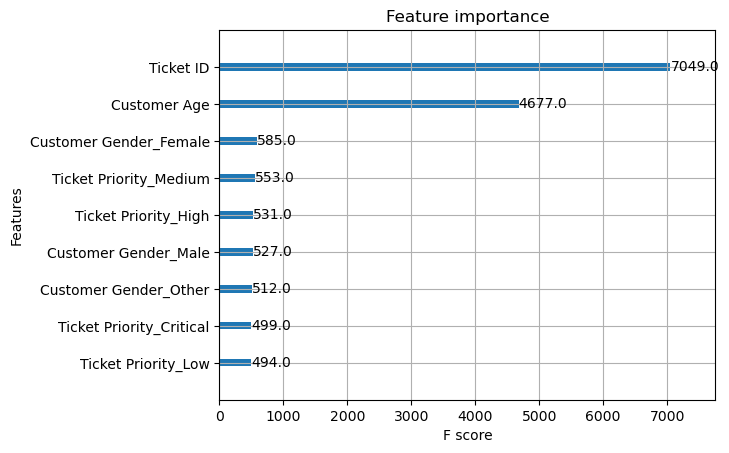

In [77]:
plot_importance(model)
plt.show()